In [24]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)
        
   

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    
        
    

In [2]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

In [3]:
X


array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   1.]])

In [4]:
y

array([[ 75.],
       [ 80.],
       [ 93.]])

In [5]:
X=X/np.amax(X,axis=0)
y=y/100

In [6]:
X,y


(array([[ 0.3,  1. ],
        [ 0.5,  0.2],
        [ 1. ,  0.2]]), array([[ 0.75],
        [ 0.8 ],
        [ 0.93]]))

In [7]:
NN=Neural_Network()

In [8]:
yH=NN.forward(X)

In [9]:
yH

array([[ 0.62394144],
       [ 0.60895644],
       [ 0.62301669]])

In [10]:
y

array([[ 0.75],
       [ 0.8 ],
       [ 0.93]])

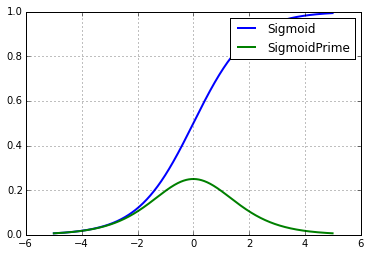

In [11]:
testValues=np.arange(-5,5,0.01)
plt.plot(testValues,NN.sigmoid(testValues),linewidth=2)
plt.plot(testValues, NN.sigmoidPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['Sigmoid','SigmoidPrime'])
#u=NN.sigmoidPrime(testValues)


In [25]:
NN=Neural_Network()

In [26]:
cost1=NN.costFunction(X,y)

In [27]:
dJdW1,dJdW2=NN.costFunctionPrime(X,y)

In [28]:
dJdW1

array([[-0.00490988, -0.00265706, -0.00447337],
       [ 0.00077834,  0.00034494,  0.00063128]])

In [29]:
dJdW2

array([[-0.01081862],
       [-0.00844067],
       [-0.00913116]])

In [30]:
scalar=3
NN.W1 = NN.W1+scalar*dJdW1
NN.W2 = NN.W2+scalar*dJdW2
cost2 = NN.costFunction(X,y)
print cost1,cost2

[ 0.01091374] [ 0.01201285]


In [31]:
scalar=3
NN.W1 = NN.W1-scalar*dJdW1
NN.W2 = NN.W2-scalar*dJdW2
cost3 = NN.costFunction(X,y)
print cost2,cost3

[ 0.01201285] [ 0.01091374]
